# Fictitious Consumer Data Analysis

### Importing the Data
If this were beyond a Demo, the data would be imported from an API similar to Plaid, where user transaction is held by a trustworthy company (and not just my web app). Such APIs automatically sort item purchases into categories, so I created the fictitious dataset to best match this.

In [1]:
import pandas as pd
df = pd.read_excel('data/fictitious_credit_card_transactions_final.xlsx')
df.head(10)

,customer_id,time_of_purchase,date_of_purchase,location_of_purchase,price,item_name,item_genre
0,C001,15:15,2025-07-24,WHOLE FOODS MKT 1023,116.16,Grocery Purchase,Food
1,C001,10:43,2025-07-24,TACO BELL 0287,34.60,Restaurant Meal,Food
2,C001,20:02,2025-07-24,CVS/PHARMACY #2211,26.26,Miscellaneous Purchase,Other
3,C001,07:35,2025-07-25,TACO BELL 0287,33.82,Restaurant Meal,Food
4,C001,21:37,2025-07-26,CVS/PHARMACY #2211,11.08,Miscellaneous Purchase,Other
5,C001,07:48,2025-07-26,STEAMGAMES.COM,61.25,Digital or Movie Entertainment,Leisure
6,C001,17:17,2025-07-26,CHIPOTLE 1147,43.08,Restaurant Meal,Food
7,C001,10:22,2025-07-27,KROGER #447,95.47,Grocery Purchase,Food
8,C001,08:46,2025-07-27,CITY WATER UTILITY,67.66,Recurring Monthly Service,Bill
9,C001,16:53,2025-07-28,SHELL OIL 1234,55.32,Transportation Expense,Transport


### Basic Analysis/Understanding the Data

In [2]:
df['item_genre'].unique()

array(['Food', 'Other', 'Leisure', 'Bill', 'Transport', 'Donation',
       'Retail'], dtype=object)

In [3]:
df['location_of_purchase'].unique()

array(['WHOLE FOODS MKT 1023', 'TACO BELL 0287', 'CVS/PHARMACY #2211',
       'STEAMGAMES.COM', 'CHIPOTLE 1147', 'KROGER #447',
       'CITY WATER UTILITY', 'SHELL OIL 1234', 'LOCAL BOOKSTORE',
       'ONLINE FUNDRAISER', 'AMC THEATRES 4412', 'RED CROSS DONATION',
       'COMCAST CABLE COMM', 'CHEVRON 9981', 'LOCAL ANIMAL SHELTER',
       'BEST BUY #142', 'WALMART SUPERCENTER', 'REGAL CINEMAS 17',
       'PLAYSTATION NETWORK', 'TARGET T-1834', 'UBER *TRIP',
       'NINTENDO ESHOP', 'HOME DEPOT 6842', 'SPOTIFY USA',
       'PEETS COFFEE 017', 'AT&T WIRELESS', 'EXXONMOBIL 2019',
       'LYFT RIDE', 'STARBUCKS #1842', 'OLIVE GARDEN 0032', 'NETFLIX.COM',
       'MCDONALDS #5521', 'WALGREENS #1043', 'LOCAL COFFEE ROASTERS',
       'AMAZON.COM*MKTP', 'OLD NAVY 447', 'ALDI STORE 91',
       'APPLE.COM/BILL', 'SUSHI HOUSE LLC', 'DUNKIN STORE 3321',
       'AMZN MKTPLACE PMTS', 'LOCAL PIZZERIA', 'STATE ELECTRIC CO'],
      dtype=object)

In [4]:
df['item_name'].unique()

array(['Grocery Purchase', 'Restaurant Meal', 'Miscellaneous Purchase',
       'Digital or Movie Entertainment', 'Recurring Monthly Service',
       'Transportation Expense', 'Charitable Donation', 'Retail Purchase',
       'Coffee - Brewed Beverage'], dtype=object)

In [5]:
df['large_purchase'] = df['price'] > 75
df

,customer_id,time_of_purchase,date_of_purchase,location_of_purchase,price,item_name,item_genre,large_purchase
0,C001,15:15,2025-07-24,WHOLE FOODS MKT 1023,116.16,Grocery Purchase,Food,True
1,C001,10:43,2025-07-24,TACO BELL 0287,34.60,Restaurant Meal,Food,False
2,C001,20:02,2025-07-24,CVS/PHARMACY #2211,26.26,Miscellaneous Purchase,Other,False
3,C001,07:35,2025-07-25,TACO BELL 0287,33.82,Restaurant Meal,Food,False
4,C001,21:37,2025-07-26,CVS/PHARMACY #2211,11.08,Miscellaneous Purchase,Other,False
...,...,...,...,...,...,...,...,...
2623,C010,13:00,2026-01-18,LYFT RIDE,43.13,Transportation Expense,Transport,False
2624,C010,15:32,2026-01-19,KROGER #447,91.15,Grocery Purchase,Food,True
2625,C010,08:41,2026-01-19,STARBUCKS #1842,7.88,Coffee - Brewed Beverage,Food,False
2626,C010,15:17,2026-01-20,CHEVRON 9981,82.95,Transportation Expense,Transport,True


In [6]:
df['date_of_purchase'].dtype

dtype('O')

Here we can see the datatype of the date column is an object. So, to rearrange and get info from this column, we'd need to first turn it into datetime type.

In [7]:
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'])
df['date_of_purchase'].dtype

dtype('<M8[ns]')

Upon further inspection, it looks like all the columns are of object type...Let's fix that too.

In [8]:
df.dtypes

customer_id                     object
time_of_purchase                object
date_of_purchase        datetime64[ns]
location_of_purchase            object
price                          float64
item_name                       object
item_genre                      object
large_purchase                    bool
dtype: object

In [9]:
df['week_number'] = df['date_of_purchase'].dt.strftime('%U')
df['month_number'] = df['date_of_purchase'].dt.strftime('%m')
df.head()

,customer_id,time_of_purchase,date_of_purchase,location_of_purchase,price,item_name,item_genre,large_purchase,week_number,month_number
0,C001,15:15,2025-07-24,WHOLE FOODS MKT 1023,116.16,Grocery Purchase,Food,True,29,07
1,C001,10:43,2025-07-24,TACO BELL 0287,34.60,Restaurant Meal,Food,False,29,07
2,C001,20:02,2025-07-24,CVS/PHARMACY #2211,26.26,Miscellaneous Purchase,Other,False,29,07
3,C001,07:35,2025-07-25,TACO BELL 0287,33.82,Restaurant Meal,Food,False,29,07
4,C001,21:37,2025-07-26,CVS/PHARMACY #2211,11.08,Miscellaneous Purchase,Other,False,29,07


In [10]:
df[['week_number', 'month_number', 'customer_id']] = df[['week_number', 'month_number', 'customer_id']].astype({'week_number' : int, 'month_number' : int, 'customer_id' : 'string'})
df[['customer_id', 'item_name', 'item_genre', 'location_of_purchase']] = df[['customer_id', 'item_name', 'item_genre', 'location_of_purchase']].astype({'customer_id' : 'string', 'item_name' : 'string', 'item_genre' : 'string', 'location_of_purchase' : 'string'})
df.dtypes

customer_id             string[python]
time_of_purchase                object
date_of_purchase        datetime64[ns]
location_of_purchase    string[python]
price                          float64
item_name               string[python]
item_genre              string[python]
large_purchase                    bool
week_number                      int64
month_number                     int64
dtype: object

In [11]:
eating_out = df[df['item_name'] == "Restaurant Meal"]
eating_out.head()

,customer_id,time_of_purchase,date_of_purchase,location_of_purchase,price,item_name,item_genre,large_purchase,week_number,month_number
1,C001,10:43,2025-07-24,TACO BELL 0287,34.60,Restaurant Meal,Food,False,29,7
3,C001,07:35,2025-07-25,TACO BELL 0287,33.82,Restaurant Meal,Food,False,29,7
6,C001,17:17,2025-07-26,CHIPOTLE 1147,43.08,Restaurant Meal,Food,False,29,7
57,C001,09:43,2025-09-03,OLIVE GARDEN 0032,56.65,Restaurant Meal,Food,False,35,9
66,C001,16:39,2025-09-09,CHIPOTLE 1147,12.50,Restaurant Meal,Food,False,36,9


## Cost vs. Purchases per Week

I want to see how the total money each customer spends each week compares to their number of purchases. Are they spending a lot on a few purchases or making a lot of smaller ones?

In [12]:
cost_by_week = df.groupby(['customer_id', 'week_number'])['price'].sum()
cost_by_week.head(10)

customer_id  week_number
C001         0               28.63
             1              587.31
             2              502.35
             3              257.15
             29             326.25
             30             418.83
             31             658.14
             32             569.19
             33             576.46
             34             360.47
Name: price, dtype: float64

In [13]:
number_of_weeks = abs(df.iloc[-1, 8] - df.iloc[0, 8]) #Equals 26; 28 including start and end months
purchases_by_week = df.groupby(['customer_id', 'week_number'])['price'].count().reset_index()
purchases_by_month = df.groupby(['customer_id', 'month_number'])['price'].count().reset_index()
purchases_by_week

,customer_id,week_number,price
0,C001,0,1
1,C001,1,11
2,C001,2,11
3,C001,3,2
4,C001,29,7
...,...,...,...
275,C010,48,6
276,C010,49,8
277,C010,50,9
278,C010,51,11


In [14]:
spending_by_week = df.groupby(['customer_id', 'week_number'])['price'].sum().reset_index()
spending_by_month = df.groupby(['customer_id', 'month_number'])['price'].sum().reset_index()
spending_by_week

,customer_id,week_number,price
0,C001,0,28.63
1,C001,1,587.31
2,C001,2,502.35
3,C001,3,257.15
4,C001,29,326.25
...,...,...,...
275,C010,48,106.16
276,C010,49,317.03
277,C010,50,475.99
278,C010,51,608.48


In [15]:
by_month_spent_df = pd.DataFrame(spending_by_month)
by_month_spent_df

,customer_id,month_number,price
0,C001,1,1375.44
1,C001,7,645.35
2,C001,8,2277.02
3,C001,9,2401.92
4,C001,10,2103.54
...,...,...,...
65,C010,8,2197.32
66,C010,9,1575.71
67,C010,10,1936.28
68,C010,11,2315.24


In [16]:
by_month_purchased_df = pd.DataFrame(purchases_by_month)
by_month_purchased_df

,customer_id,month_number,price
0,C001,1,25
1,C001,7,12
2,C001,8,44
3,C001,9,42
4,C001,10,40
...,...,...,...
65,C010,8,41
66,C010,9,40
67,C010,10,40
68,C010,11,40


In [17]:
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='month_number'>

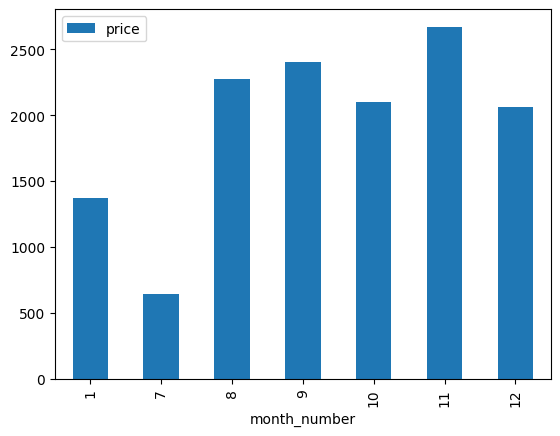

In [18]:
by_month_C1 = by_month_spent_df[by_month_spent_df['customer_id'] == 'C001']
by_month_C1.plot(kind='bar', x='month_number', y='price')

In [19]:
customers = df['customer_id'].unique()
print(customers)

<StringArray>
['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009',
 'C010']
Length: 10, dtype: string


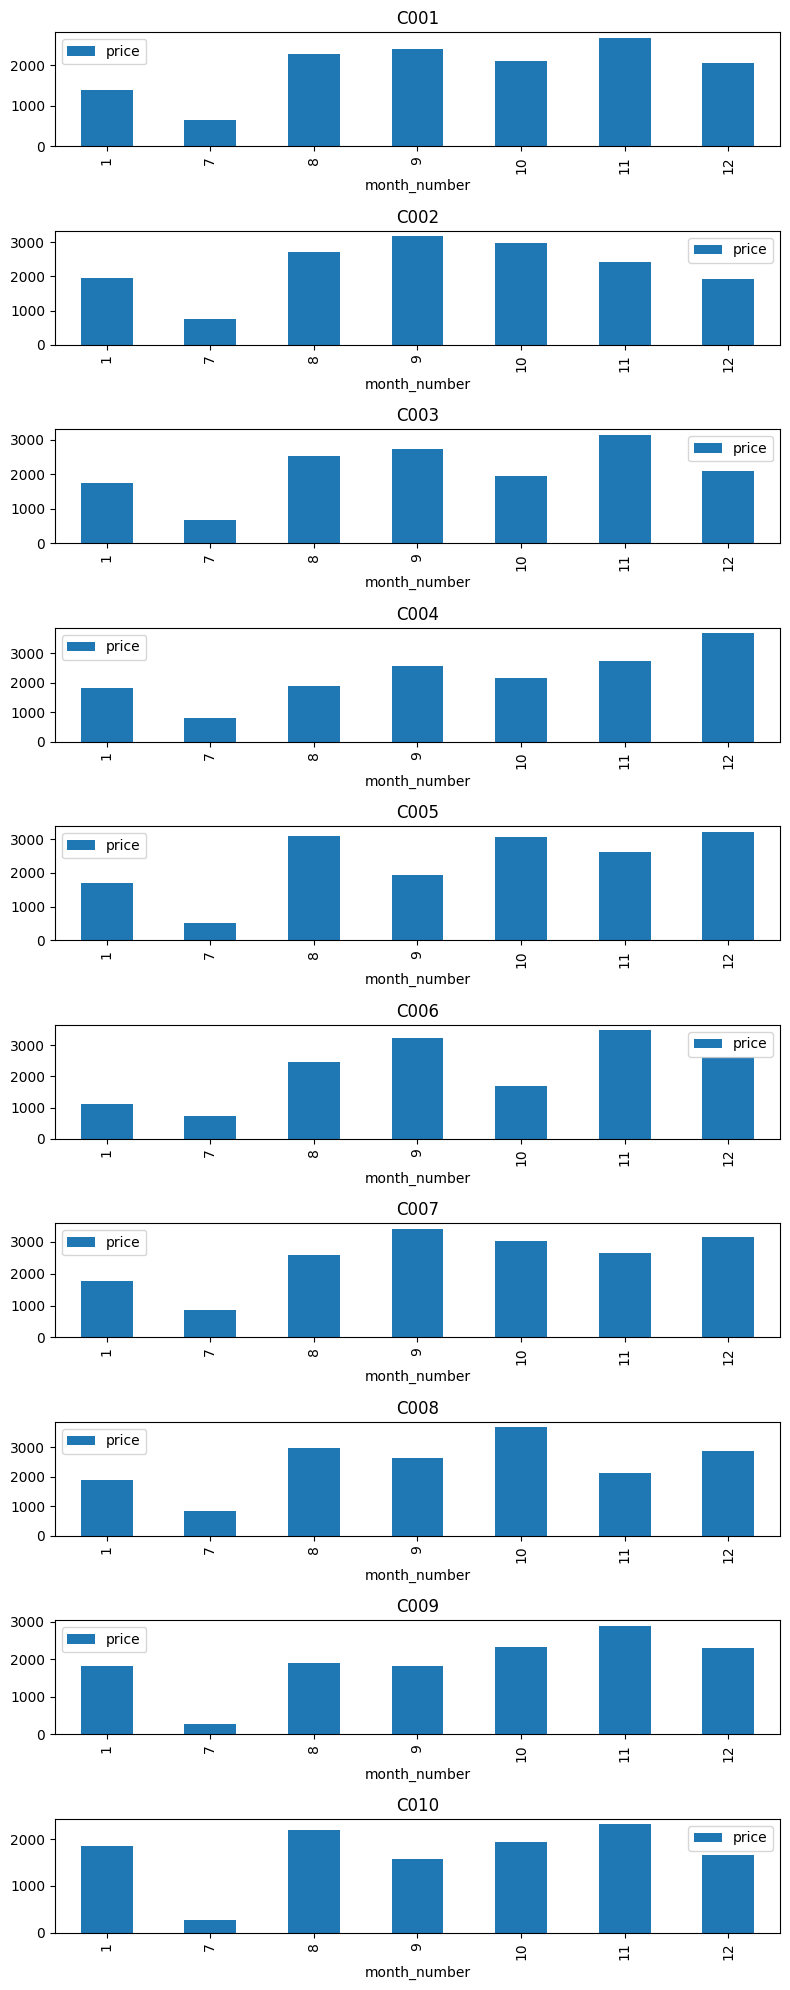

In [20]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8, 20))

for i, customer in enumerate(customers):
    customer_data = by_month_spent_df[by_month_spent_df['customer_id'] == customer]
    customer_data.plot(kind='bar', x='month_number', y='price', ax=axes[i])
    axes[i].set_title(customer)

plt.tight_layout()
plt.show()


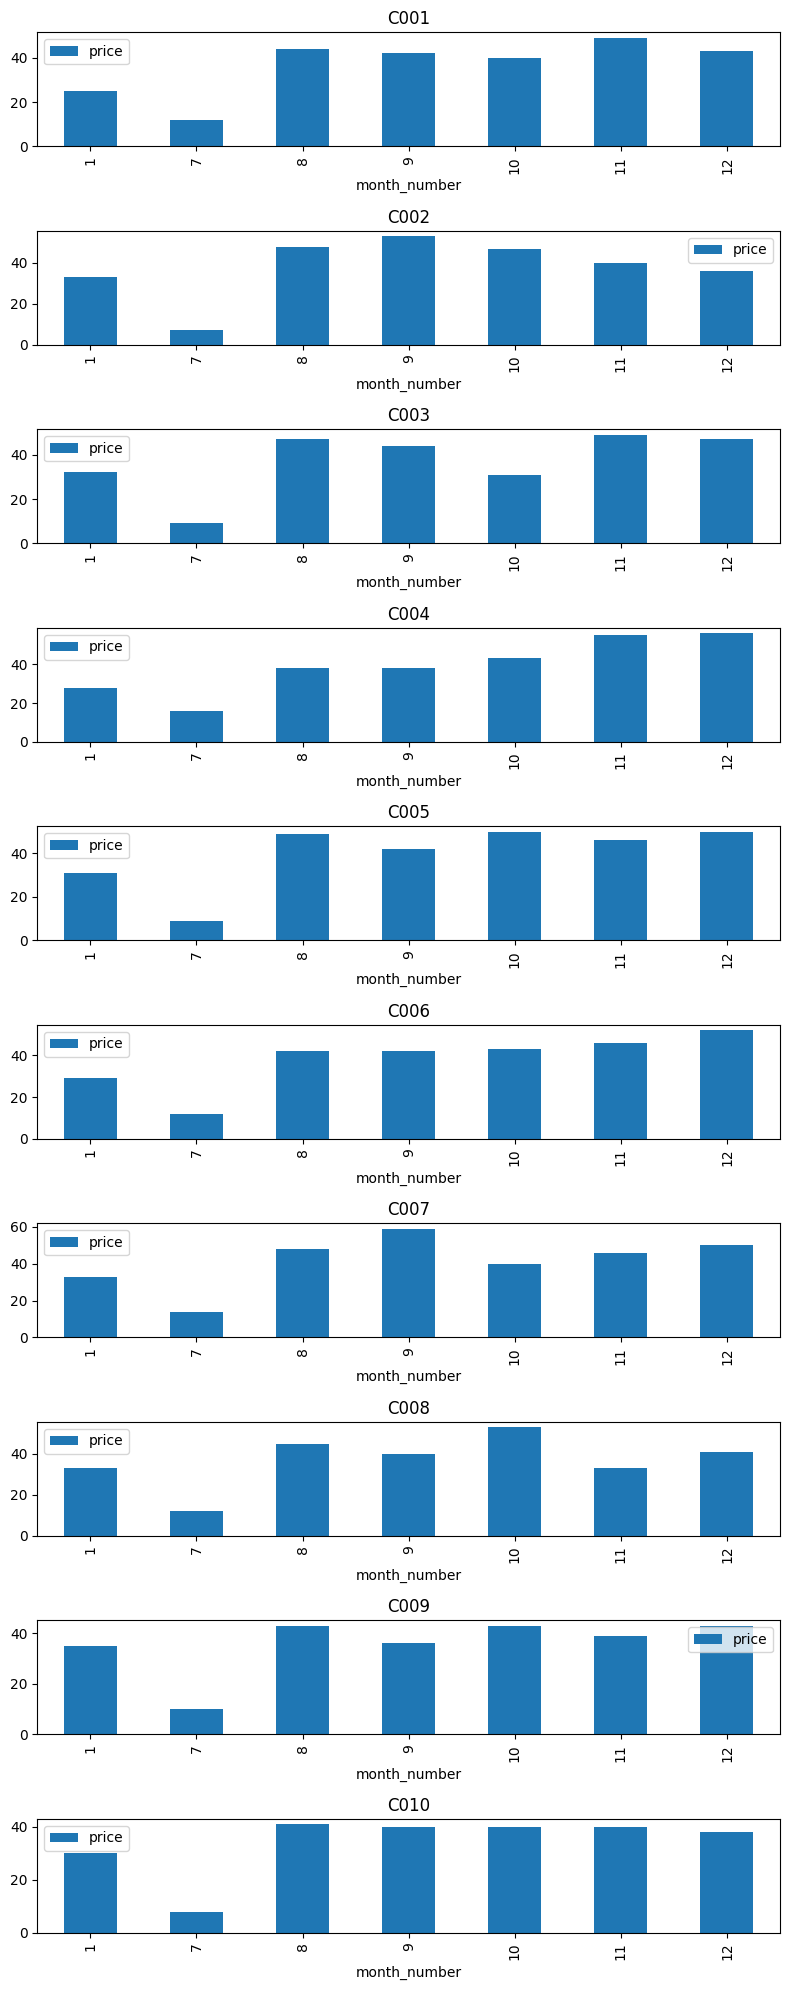

In [21]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8, 20))

for i, customer in enumerate(customers):
    customer_data = by_month_purchased_df[by_month_purchased_df['customer_id'] == customer]
    customer_data.plot(kind='bar', x='month_number', y='price', ax=axes[i])
    axes[i].set_title(customer)

plt.tight_layout()
plt.show()

## Determining Spending Archetype for C001
I want to learn more about C001 from the data. How do they spend, and how often? Do they have any routine purchases? Do they have lots of leisure expenses, or lots of food costs? Let's find out. By characterizing this spender (along with the rest in the future), users can relate to them and choose to select them in the Demo, which substitutes the need for them entering in their own bank statements; they can just pretend to be the archetype that best fits them!

In [22]:
df1 = df[df['customer_id'] == "C001"]
df1

,customer_id,time_of_purchase,date_of_purchase,location_of_purchase,price,item_name,item_genre,large_purchase,week_number,month_number
0,C001,15:15,2025-07-24,WHOLE FOODS MKT 1023,116.16,Grocery Purchase,Food,True,29,7
1,C001,10:43,2025-07-24,TACO BELL 0287,34.60,Restaurant Meal,Food,False,29,7
2,C001,20:02,2025-07-24,CVS/PHARMACY #2211,26.26,Miscellaneous Purchase,Other,False,29,7
3,C001,07:35,2025-07-25,TACO BELL 0287,33.82,Restaurant Meal,Food,False,29,7
4,C001,21:37,2025-07-26,CVS/PHARMACY #2211,11.08,Miscellaneous Purchase,Other,False,29,7
...,...,...,...,...,...,...,...,...,...,...
250,C001,10:54,2026-01-15,CHEVRON 9981,71.86,Transportation Expense,Transport,False,2,1
251,C001,13:41,2026-01-15,AMAZON.COM*MKTP,90.27,Retail Purchase,Retail,True,2,1
252,C001,14:08,2026-01-17,PEETS COFFEE 017,3.65,Coffee - Brewed Beverage,Food,False,2,1
253,C001,13:37,2026-01-19,WALMART SUPERCENTER,81.00,Grocery Purchase,Food,True,3,1


In [23]:
c1_expenses_old = df1[['location_of_purchase', 'item_genre', 'item_name', 'price']]
c1_expenses_old

,location_of_purchase,item_genre,item_name,price
0,WHOLE FOODS MKT 1023,Food,Grocery Purchase,116.16
1,TACO BELL 0287,Food,Restaurant Meal,34.60
2,CVS/PHARMACY #2211,Other,Miscellaneous Purchase,26.26
3,TACO BELL 0287,Food,Restaurant Meal,33.82
4,CVS/PHARMACY #2211,Other,Miscellaneous Purchase,11.08
...,...,...,...,...
250,CHEVRON 9981,Transport,Transportation Expense,71.86
251,AMAZON.COM*MKTP,Retail,Retail Purchase,90.27
252,PEETS COFFEE 017,Food,Coffee - Brewed Beverage,3.65
253,WALMART SUPERCENTER,Food,Grocery Purchase,81.00


In [24]:
c1_expenses = c1_expenses_old.groupby('item_genre')['price'].sum().reset_index()
c1_expenses.set_index('item_genre', inplace=True)
c1_expenses

,price
item_genre,
Bill,2578.18
Donation,966.13
Food,4075.51
Leisure,1167.71
Other,840.80
Retail,2464.70
Transport,1440.36


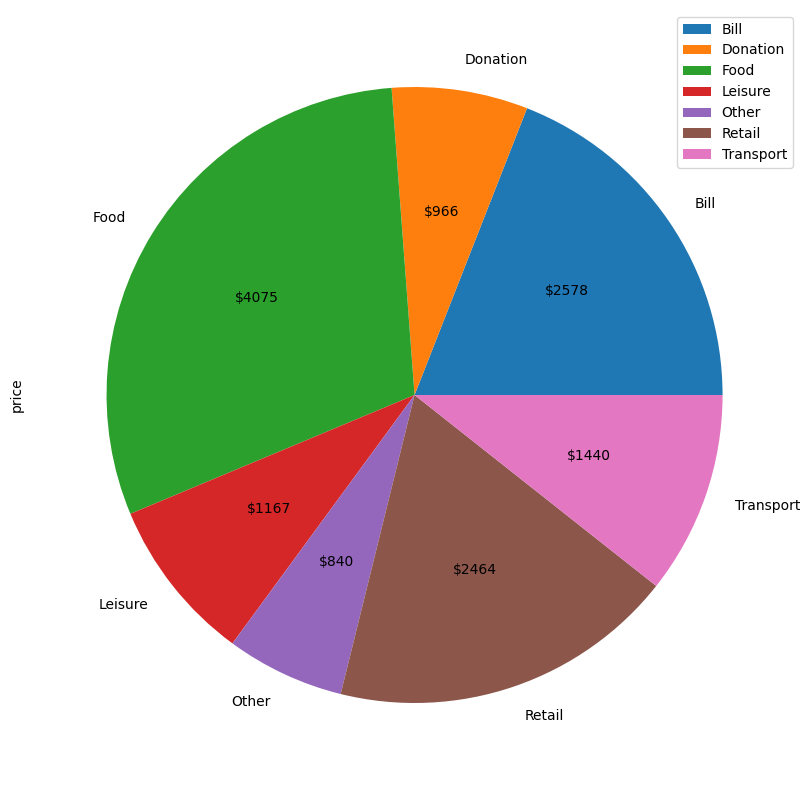

In [25]:
def show_values(pct, data):
    absolute = int((pct / 100) * np.sum(data))
    return f'${absolute}'

plot = c1_expenses.plot.pie(y='price', figsize=(10,10), autopct= lambda x: show_values(x, c1_expenses['price']))

<Axes: ylabel='price'>

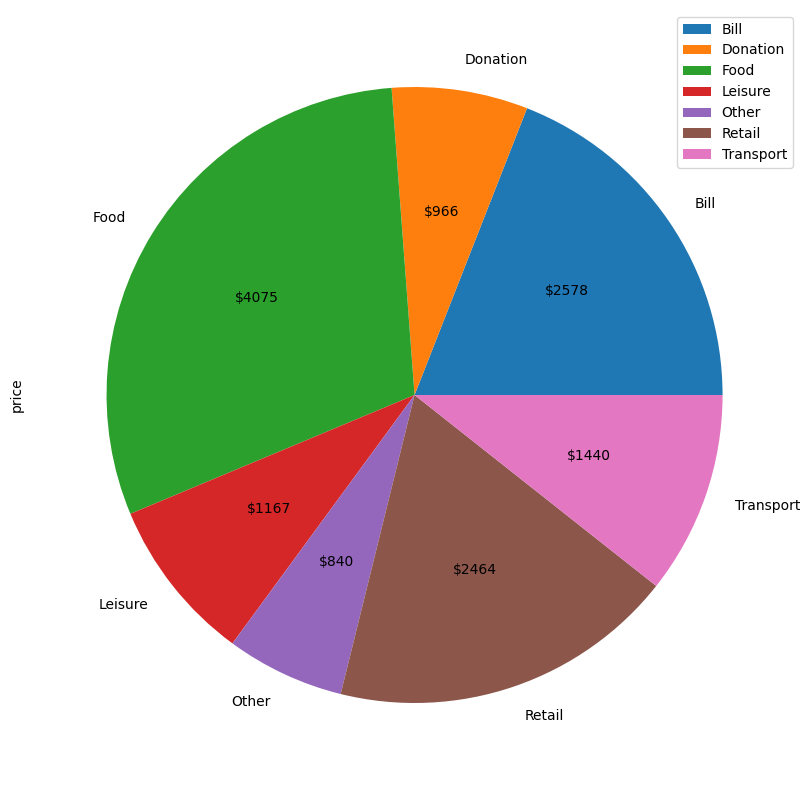

In [26]:
def generate_expense_pie_chart(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby('item_genre')['price'].sum().reset_index()
    customer_df.set_index('item_genre', inplace=True)
    plot = customer_df.plot.pie(y='price', figsize=(10,10), autopct= lambda x: show_values(x, customer_df['price']))
    return plot

generate_expense_pie_chart("C001")

As we can see, C1 doesn't spend too much on leisure, even over the course of multiple months. But transport seems a little high; let's look into that.

In [27]:
c1_transport = c1_expenses_old[c1_expenses_old['item_genre'] == 'Transport']
c1_transport

,location_of_purchase,item_genre,item_name,price
9,SHELL OIL 1234,Transport,Transportation Expense,55.32
12,SHELL OIL 1234,Transport,Transportation Expense,73.81
17,CHEVRON 9981,Transport,Transportation Expense,41.57
21,CHEVRON 9981,Transport,Transportation Expense,82.18
36,UBER *TRIP,Transport,Transportation Expense,23.41
44,EXXONMOBIL 2019,Transport,Transportation Expense,9.65
45,UBER *TRIP,Transport,Transportation Expense,30.52
48,LYFT RIDE,Transport,Transportation Expense,31.51
49,LYFT RIDE,Transport,Transportation Expense,39.16
51,EXXONMOBIL 2019,Transport,Transportation Expense,19.51


Ah, that would explain it. It seems like C1 spends a lot on Uber and Lyft. Let's see just how often and how much they spend.

In [28]:
rides = c1_transport[c1_transport['location_of_purchase'].isin(["UBER *TRIP", "LYFT RIDE"])]
rides_total = rides['price'].sum()
percent_rides = round(((rides['price'].sum()) / c1_transport['price'].sum()) * 100, 2)
print(percent_rides)
print(rides_total)

23.22
334.45


It looks like C1's Uber and Lyft rides only make up about 23% of their total transport expenses (about $330 bi-annually). And while that isn't too much, it's still nothing to gloss over. The purpose of this Demo isn't to save thousands of dollars; it's to show users where their most common unecessary expenses are and encourage them to cut back on them.

## Generalizing Findings
While this analysis was fun and all, the point of the demo would be to help out any given user automatically, not with the help of someone else. How do we do this? Well, it would be difficult to understand the exact scenario a user is in, even with their transaction history and an API like Plaid to categorize these expenses. i.e. it would be hard to tell a user who drinks a lot of coffee to downgrade the size they order each day if I don't know the sizes available at their local coffee store or what the prices or the size they're already getting. So, instead, my hope is to show the most common expenses (aside from bills). By doing this, users can become aware of their spending. From there, I will generate a list of tips to help users out with limiting their spending in each category. Each category will have a long list of tips, but only certain ones will apply (and therefore be shown) to users as they proceed through the Demo (like I said before, the purpose of the Demo is for it to work the same as it would if real people used it; not fictional people). These simple tips will make it easy for people to make small improvements to their spending and therefore my Demo will be of use. Hooray!

(I'll keep operating on C2 for now, but know that everything done to this customer can be generalized to all others easily)

### Category Pie Chart with Labels (Overall Spending)

In [29]:
c2 = df[df['customer_id'] == 'C002']
c2_expenses = c2[['location_of_purchase', 'price', 'item_genre', 'item_name']]
c2_category_spending_sum = c2.groupby('item_genre')['price'].sum().reset_index()
c2_category_spending_sum.set_index('item_genre', inplace=True)

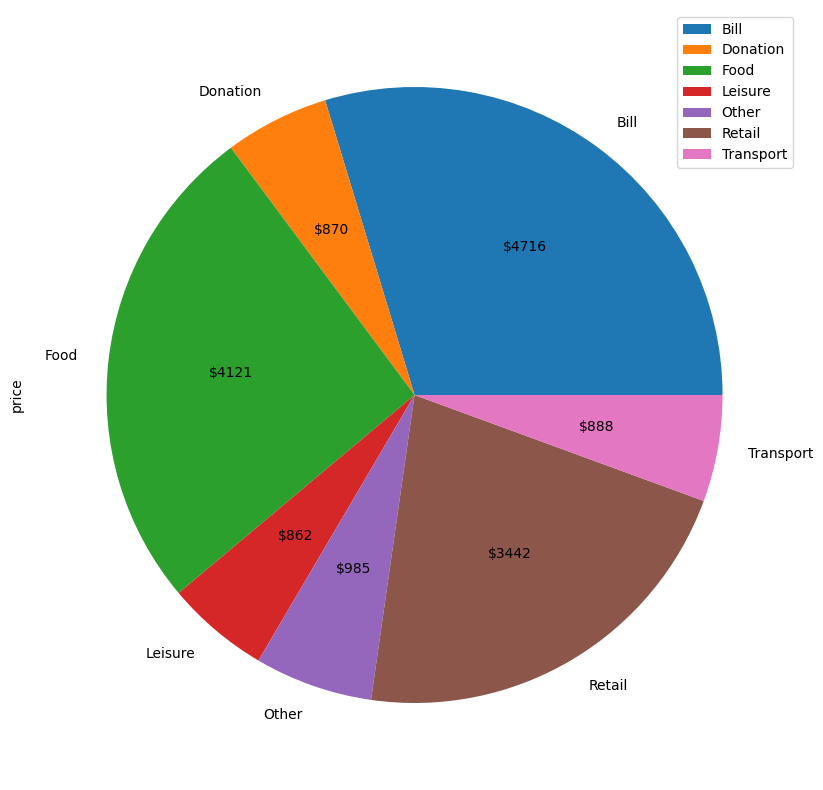

In [30]:
plot = c2_category_spending_sum.plot.pie(y='price', figsize=(10,10), autopct= lambda x: show_values(x, c2_category_spending_sum['price']))

In [31]:
top3_overall_expenses = (c2_category_spending_sum.sort_values('price', ascending=False)).reset_index().iloc[:3]
top3_overall_expenses.set_index('item_genre', inplace=True)
top3_overall_expenses
top3_expense_categories = top3_overall_expenses.index.tolist()
top3_expense_categories

['Bill', 'Food', 'Retail']

### Category Pie Chart with Spending (Top 3 Categories)

In [32]:
c2_expenses_top = c2_expenses[c2_expenses['item_genre'].isin(top3_expense_categories)]
c2_expenses_top

,location_of_purchase,price,item_genre,item_name
255,ALDI STORE 91,43.92,Food,Grocery Purchase
256,ALDI STORE 91,126.86,Food,Grocery Purchase
258,AMZN MKTPLACE PMTS,105.39,Retail,Retail Purchase
259,OLD NAVY 447,158.39,Retail,Retail Purchase
261,AMZN MKTPLACE PMTS,170.39,Retail,Retail Purchase
...,...,...,...,...
512,BEST BUY #142,17.58,Retail,Retail Purchase
514,CITY WATER UTILITY,207.66,Bill,Recurring Monthly Service
516,WALMART SUPERCENTER,82.81,Food,Grocery Purchase
517,STARBUCKS #1842,12.45,Food,Coffee - Brewed Beverage


#### Expense Category #1 (Largest One)

In [33]:
c2_top_expense_1 = c2_expenses_top[c2_expenses_top['item_genre'] == top3_expense_categories[0]]
c2_top_expense_1 = c2_top_expense_1.groupby('location_of_purchase')['price'].sum().reset_index()
c2_top_expense_1.set_index('location_of_purchase', inplace=True)
c2_top_expense_1

,price
location_of_purchase,
AT&T WIRELESS,1080.13
CITY WATER UTILITY,977.47
COMCAST CABLE COMM,900.89
STATE ELECTRIC CO,1758.00


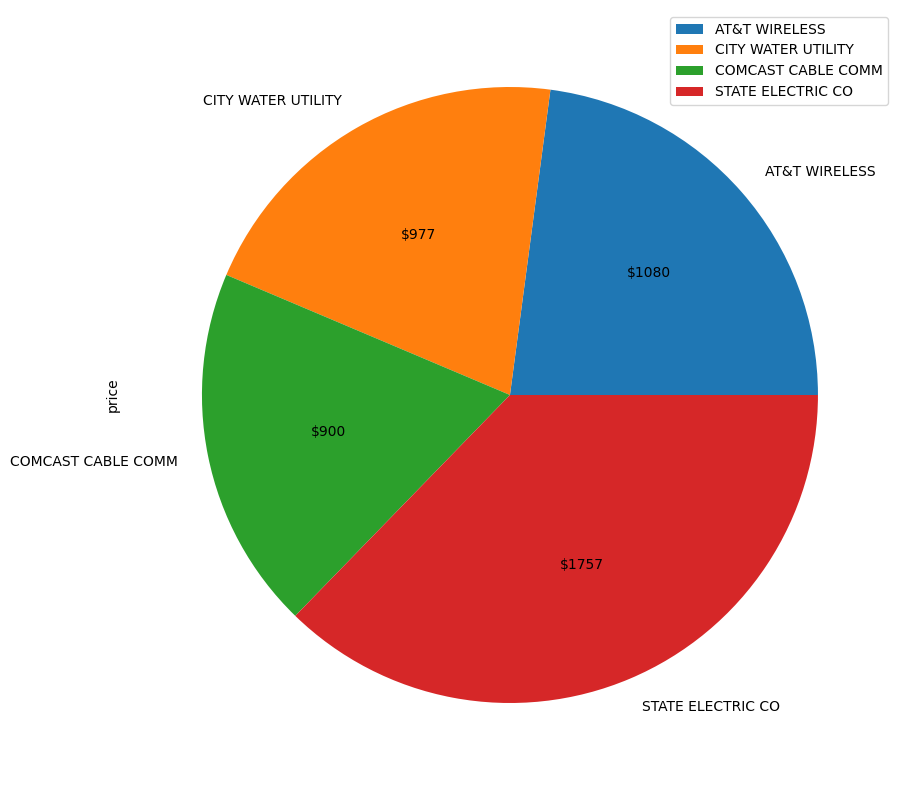

In [34]:
plot = c2_top_expense_1.plot.pie(y='price', figsize=(10,10), autopct= lambda x: show_values(x, c2_top_expense_1['price']))

#### (Let's see if I can use a For loop for this...)

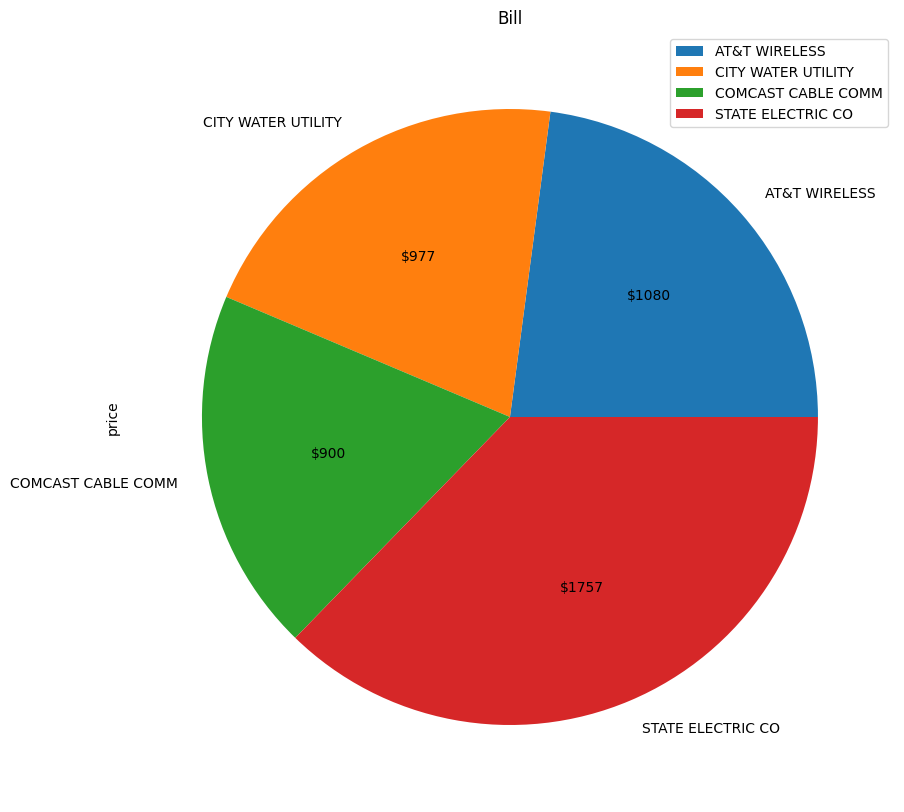

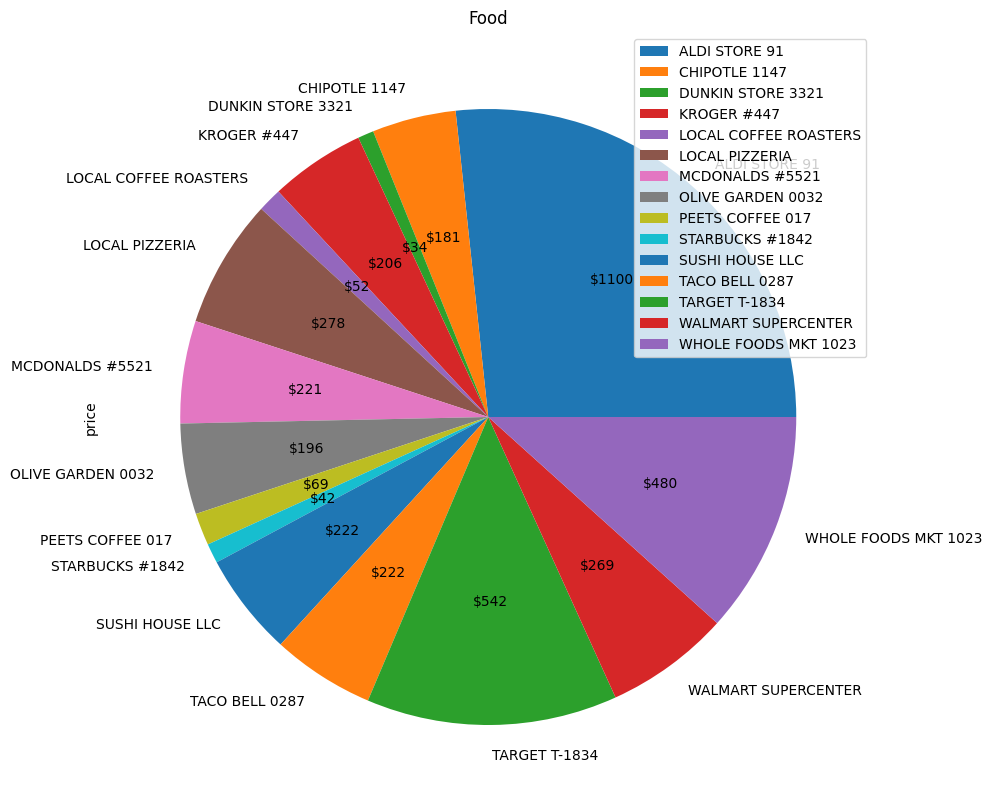

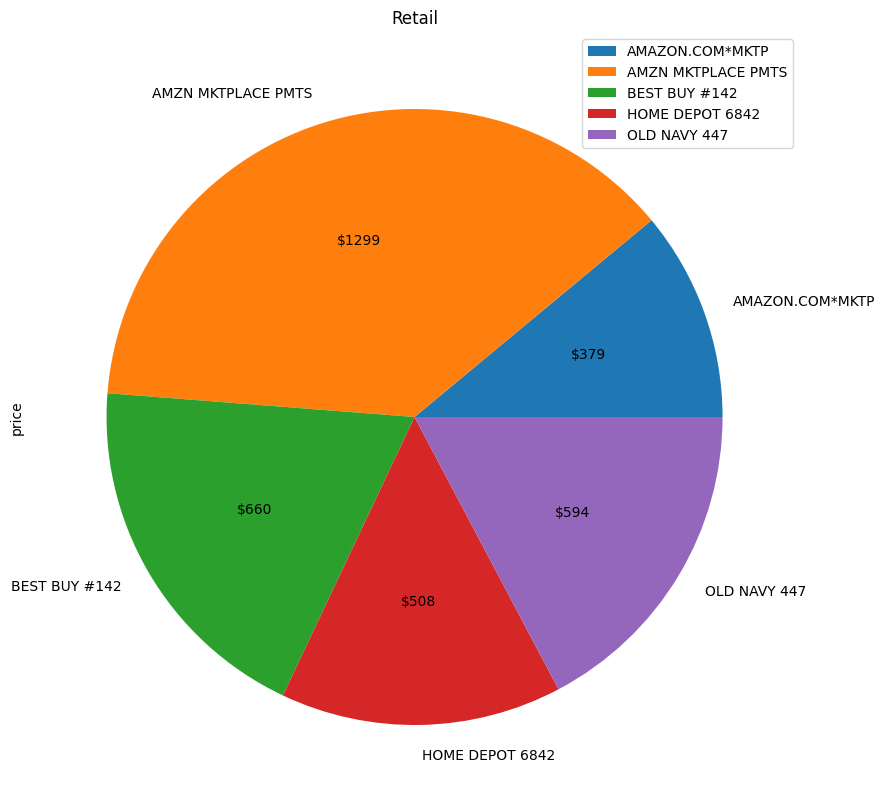

In [35]:
plots_top_3 = {}

for i in range(3):
    c2_top_expense = c2_expenses_top[c2_expenses_top['item_genre'] == top3_expense_categories[i]]
    c2_top_expense = c2_top_expense.groupby('location_of_purchase')['price'].sum().reset_index()
    c2_top_expense.set_index('location_of_purchase', inplace=True)
    plot = c2_top_expense.plot.pie(y='price', figsize=(10,10), autopct= lambda x: show_values(x, c2_top_expense['price']), title=top3_expense_categories[i])
    top_3_expenses = c2_top_expense[:3]
    plots_top_3[f'{top3_expense_categories[i]}'] = plot, top_3_expenses
    

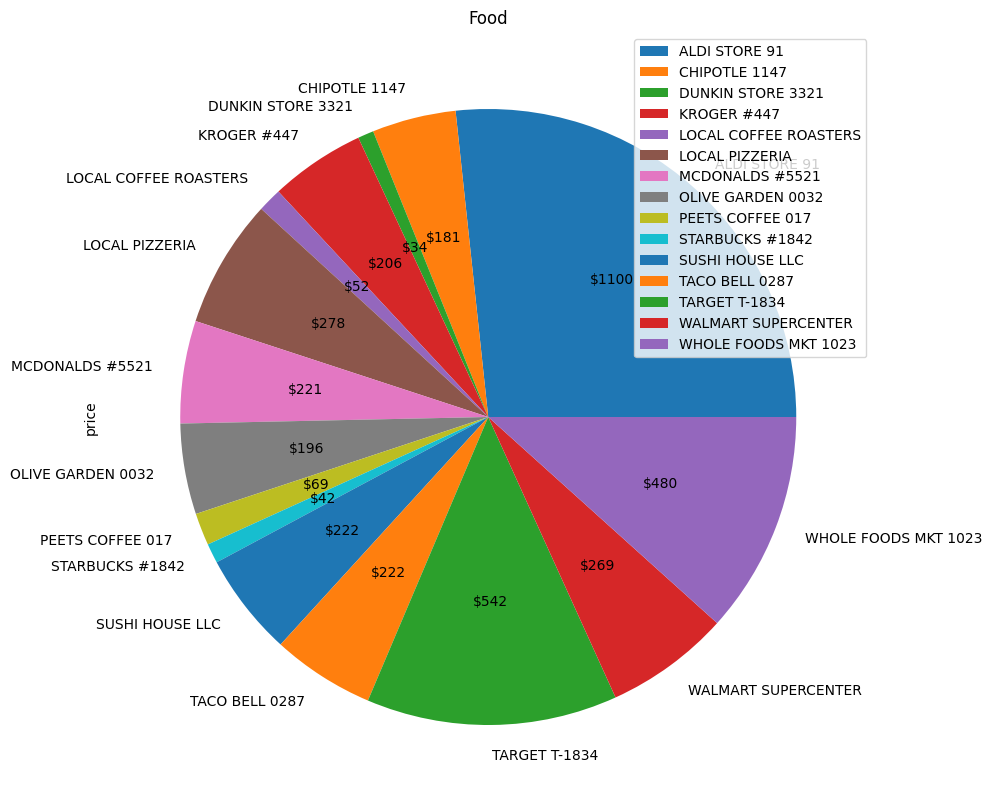

In [36]:
plot = plots_top_3['Food'][0].get_figure()
plot #It works!

Now that I think about it, I could probably use an even larger for loop to get data like this from EVERY customer and put it into a dictioary. Would that be overly useful? Not right now, but probably for the demo when referencing different customer archetypes.

## Importing Tips CSV

In [37]:
tips = pd.read_csv('data/Expense Savings Tips (All).csv')
tips

,Category,Tip #,Tip,Source
0,FOOD_RETAIL_GROCERIES,1,Always shop with a list to avoid impulse purch...,The Every Girl
1,FOOD_RETAIL_GROCERIES,2,Buy own-brand products instead of big-brand to...,BBC Good Food
2,FOOD_RETAIL_GROCERIES,3,Purchase frozen fruits and vegetables instead ...,The Every Girl
3,FOOD_RETAIL_GROCERIES,4,"Buy in bulk for staples like grains, beans, le...",In Charge
4,FOOD_RETAIL_GROCERIES,5,Use store rewards cards and loyalty programs t...,The Every Girl
...,...,...,...,...
57,RENT_AND_UTILITIES,6,Compare insurance providers annually for bundl...,MoneyFit
58,RENT_AND_UTILITIES,7,Ask about low-income assistance programs if yo...,MoneyFit
59,RENT_AND_UTILITIES,8,Negotiate your internet bill annually by threa...,MoneyFit
60,RENT_AND_UTILITIES,9,Install a programmable water heater timer to e...,MoneyFit


In [38]:
tips['Category'].unique()

array(['FOOD_RETAIL_GROCERIES', 'DINING', 'TRANSPORTATION',
       'TRAVEL_FLIGHTS', 'TRAVEL_LODGING', 'GENERAL_MERCHANDISE',
       'RENT_AND_UTILITIES'], dtype=object)

In [39]:
df['item_genre'].unique()

<StringArray>
['Food', 'Other', 'Leisure', 'Bill', 'Transport', 'Donation', 'Retail']
Length: 7, dtype: string

In [40]:
mapping = {
    'FOOD_RETAIL_GROCERIES' : 'Food',
    'DINING' : 'Food',
    'TRANSPORTATION' : 'Transport',
    'TRAVEL_FLIGHTS' : 'Leisure',
    'TRAVEL_LODGING' : 'Leisure',
    'GENERAL_MERCHANDISE' : 'Retail',
    'RENT_AND_UTILITIES' : 'Bill'
}
tips['Category'] = tips['Category'].replace(mapping)

In [41]:
c3 = df[df['customer_id'] == 'C003']
c3_top3 = c3.groupby(['item_genre'])['price'].sum().reset_index()
c3_top3 = c3_top3.sort_values(by=['price'], ascending=False)[:3]['item_genre'].tolist()
c3_top3

['Food', 'Retail', 'Bill']

In [42]:
def find_top_item_genres(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby(['item_genre'])['price'].sum().reset_index().sort_values(by=['price'], ascending=False)['item_genre'].tolist()
    return customer_df

In [43]:
def get_tips(tips, customer_id):
    categories = find_top_item_genres(customer_id)[:4]
    suggestions = tips[tips['Category'].isin(categories)]
    user_tips = []
    for i in categories:
        for j in range(3):
            category_tips = suggestions[suggestions['Category'] == i]['Tip']
            random_tip = np.random.randint(0, 10)
            suggest = category_tips.iloc[random_tip]
            while suggest in user_tips:
                random_tip = np.random.randint(0, 10)
                suggest = category_tips.iloc[random_tip]
            user_tips.append(suggest)
    return user_tips
get_tips(tips, "C001")

['Use store rewards cards and loyalty programs to earn points and access exclusive discounts',
 'Buy in bulk for staples like grains, beans, lentils, and nuts to reduce per-unit costs',
 'Buy own-brand products instead of big-brand to save up to 60% on items like canned goods',
 'Negotiate your internet bill annually by threatening to switch to competitors for better rates',
 'Unplug devices when not in use to eliminate phantom power drain that increases your electric bill',
 'Set your water heater to 120°F and fix any leaks promptly to reduce water usage and bills',
 'Look for items on top and bottom shelves where least expensive options are often located',
 "Join wholesale clubs like Costco or Sam's Club if you shop frequently and use the savings",
 'Buy clothing and household items secondhand when possible to save 50-80% on costs',
 'Keep your tires properly inflated to improve fuel efficiency and reduce gas consumption',
 'Compare car insurance rates annually as they can fluctuate 

In [45]:
highest_user = [input("What's your current highest spending category?")]
# get_tips(highest_user)

### Top/Most Common Expenses per Category

In [46]:
customer_df = df[df['customer_id'] == 'C001']
sorted_expenses = customer_df.groupby(['item_genre', 'location_of_purchase'])['price'].sum().reset_index()
sorted_expenses = sorted_expenses.sort_values(by=['item_genre', 'price'], ascending=False)
print(sorted_expenses['item_genre'])

38    Transport
41    Transport
39    Transport
40    Transport
42    Transport
37       Retail
36       Retail
35       Retail
33       Retail
34       Retail
31        Other
30        Other
28        Other
29        Other
32        Other
27        Other
25      Leisure
24      Leisure
26      Leisure
22      Leisure
23      Leisure
21         Food
10         Food
20         Food
7          Food
19         Food
8          Food
13         Food
18         Food
14         Food
12         Food
16         Food
17         Food
11         Food
15         Food
9          Food
5      Donation
6      Donation
4      Donation
0          Bill
2          Bill
3          Bill
1          Bill
Name: item_genre, dtype: string


In [47]:
def top_expense_per_category(customer_id):
    top = {}
    customer_df = df[df['customer_id'] == customer_id]
    sorted_expenses = customer_df.groupby(['item_genre', 'location_of_purchase'])['price'].sum().reset_index()
    sorted_expenses = sorted_expenses.sort_values(by=['item_genre', 'price'], ascending=False)
    for i in sorted_expenses['item_genre'].unique():
        top[f'{i}'] = (sorted_expenses[sorted_expenses['item_genre'] == i]['price'].max()).round(2), sorted_expenses[sorted_expenses['item_genre'] == i]['location_of_purchase'].iloc[0]
    return top

top_expense_per_category('C007')

{'Transport': (np.float64(360.92), 'CHEVRON 9981'),
 'Retail': (np.float64(1448.31), 'OLD NAVY 447'),
 'Other': (np.float64(229.67), 'NETFLIX.COM'),
 'Leisure': (np.float64(419.51), 'REGAL CINEMAS 17'),
 'Food': (np.float64(881.29), 'KROGER #447'),
 'Donation': (np.float64(355.71), 'ONLINE FUNDRAISER'),
 'Bill': (np.float64(1551.61), 'AT&T WIRELESS')}

In [48]:
def most_common_expenses_per_category(customer_id):
    top = {}
    customer_df = df[df['customer_id'] == customer_id]
    sorted_expenses = customer_df.groupby(['item_genre', 'location_of_purchase'])['price'].count().reset_index()
    sorted_expenses = sorted_expenses.sort_values(by=['item_genre', 'price'], ascending=False)
    for i in sorted_expenses['item_genre'].unique():
        top[f'{i}'] = (sorted_expenses[sorted_expenses['item_genre'] == i]['price'].max()), sorted_expenses[sorted_expenses['item_genre'] == i]['location_of_purchase'].iloc[:3]
    return top

most_common_expenses_per_category('C007')

{'Transport': (np.int64(11),
  42         UBER *TRIP
  38       CHEVRON 9981
  39    EXXONMOBIL 2019
  Name: location_of_purchase, dtype: string),
 'Retail': (np.int64(10),
  37          OLD NAVY 447
  33       AMAZON.COM*MKTP
  34    AMZN MKTPLACE PMTS
  Name: location_of_purchase, dtype: string),
 'Other': (np.int64(10),
  31        SPOTIFY USA
  30        NETFLIX.COM
  29    LOCAL BOOKSTORE
  Name: location_of_purchase, dtype: string),
 'Leisure': (np.int64(10),
  25     REGAL CINEMAS 17
  23       NINTENDO ESHOP
  22    AMC THEATRES 4412
  Name: location_of_purchase, dtype: string),
 'Food': (np.int64(12),
  13    MCDONALDS #5521
  16    STARBUCKS #1842
  7       ALDI STORE 91
  Name: location_of_purchase, dtype: string),
 'Donation': (np.int64(7),
  5       ONLINE FUNDRAISER
  4    LOCAL ANIMAL SHELTER
  6      RED CROSS DONATION
  Name: location_of_purchase, dtype: string),
 'Bill': (np.int64(11),
  2    COMCAST CABLE COMM
  0         AT&T WIRELESS
  3     STATE ELECTRIC CO
  Nam

(not gonna lie I'm pretty proud of this function here; thought it all up on my own using my own pandas knowledge...so proud)

### Standard Spending Deviations

In [49]:
df

,customer_id,time_of_purchase,date_of_purchase,location_of_purchase,price,item_name,item_genre,large_purchase,week_number,month_number
0,C001,15:15,2025-07-24,WHOLE FOODS MKT 1023,116.16,Grocery Purchase,Food,True,29,7
1,C001,10:43,2025-07-24,TACO BELL 0287,34.60,Restaurant Meal,Food,False,29,7
2,C001,20:02,2025-07-24,CVS/PHARMACY #2211,26.26,Miscellaneous Purchase,Other,False,29,7
3,C001,07:35,2025-07-25,TACO BELL 0287,33.82,Restaurant Meal,Food,False,29,7
4,C001,21:37,2025-07-26,CVS/PHARMACY #2211,11.08,Miscellaneous Purchase,Other,False,29,7
...,...,...,...,...,...,...,...,...,...,...
2623,C010,13:00,2026-01-18,LYFT RIDE,43.13,Transportation Expense,Transport,False,3,1
2624,C010,15:32,2026-01-19,KROGER #447,91.15,Grocery Purchase,Food,True,3,1
2625,C010,08:41,2026-01-19,STARBUCKS #1842,7.88,Coffee - Brewed Beverage,Food,False,3,1
2626,C010,15:17,2026-01-20,CHEVRON 9981,82.95,Transportation Expense,Transport,True,3,1


In [50]:
c1_mean = by_month_C1['price'].mean()
c1_mean

np.float64(1933.3414285714284)

In [51]:
c1_std = by_month_C1['price'].std()
c1_std

np.float64(694.8216050284316)

In [52]:
import numpy as np
import matplotlib.pyplot as plt

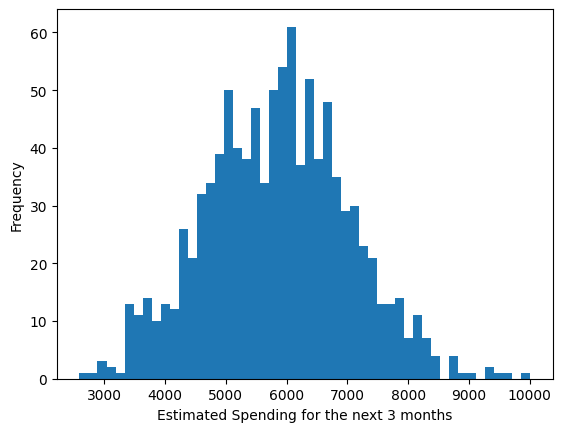

In [53]:
def generate_monte_carlo(user_id):
    months = int(input("How many months in advance would you like the simulation to run?"))
    sim_num = 1000
    finals = []
    testing = df[df['customer_id'] == user_id]
    testing = testing.groupby(['customer_id', 'month_number'])['price'].sum().reset_index()
    c_mean = testing['price'].mean()
    c_std = testing['price'].std()
    for i in range(sim_num):
        month_spending = np.random.normal(c_mean, c_std, months).round(2)
        finals.append(month_spending.sum())
    finals = np.array(finals)
    plt.hist(finals, bins=50)
    plt.ylabel("Frequency")
    plt.xlabel(f"Estimated Spending for the next {months} months")
    plt.show()
        

generate_monte_carlo('C001')

## Defining Customer Archetypes
Attributes defining a Customer's Achetype:
- How many expenses they have each month (on average)
- How much they spend each month (cost rating)
- Their top expense category (and top expense in each category)
- How much their expenses vary from month to month (or week to week)

In [54]:
def find_top_item_genres(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby(['item_genre'])['price'].sum().reset_index().sort_values(by=['price'], ascending=False)['item_genre'].tolist()
    return customer_df
    
find_top_item_genres('C008')
    

['Food', 'Retail', 'Bill', 'Donation', 'Transport', 'Leisure', 'Other']

In [55]:
def top_expense_per_category(customer_id):
    top = {}
    customer_df = df[df['customer_id'] == customer_id]
    sorted_expenses = customer_df.groupby(['item_genre', 'location_of_purchase'])['price'].sum().reset_index()
    sorted_expenses = sorted_expenses.sort_values(by=['item_genre', 'price'], ascending=False)
    for i in sorted_expenses['item_genre'].unique():
        top[f'{i}'] = (sorted_expenses[sorted_expenses['item_genre'] == i]['price'].max()).round(2), sorted_expenses[sorted_expenses['item_genre'] == i]['location_of_purchase'].iloc[:3]
    return top

top_expense_per_category('C010')

{'Transport': (np.float64(263.7),
  40          LYFT RIDE
  41     SHELL OIL 1234
  39    EXXONMOBIL 2019
  Name: location_of_purchase, dtype: string),
 'Retail': (np.float64(570.44),
  37          OLD NAVY 447
  35         BEST BUY #142
  34    AMZN MKTPLACE PMTS
  Name: location_of_purchase, dtype: string),
 'Other': (np.float64(170.82),
  32       WALGREENS #1043
  28    CVS/PHARMACY #2211
  27        APPLE.COM/BILL
  Name: location_of_purchase, dtype: string),
 'Leisure': (np.float64(363.02),
  26         STEAMGAMES.COM
  25       REGAL CINEMAS 17
  24    PLAYSTATION NETWORK
  Name: location_of_purchase, dtype: string),
 'Food': (np.float64(664.17),
  10      KROGER #447
  7     ALDI STORE 91
  19    TARGET T-1834
  Name: location_of_purchase, dtype: string),
 'Donation': (np.float64(380.4),
  5       ONLINE FUNDRAISER
  4    LOCAL ANIMAL SHELTER
  6      RED CROSS DONATION
  Name: location_of_purchase, dtype: string),
 'Bill': (np.float64(1436.8),
  2    COMCAST CABLE COMM
  3    

In [56]:
def most_common_expenses_per_category(customer_id):
    top = {}
    customer_df = df[df['customer_id'] == customer_id]
    sorted_expenses = customer_df.groupby(['item_genre', 'location_of_purchase'])['price'].count().reset_index()
    sorted_expenses = sorted_expenses.sort_values(by=['item_genre', 'price'], ascending=False)
    for i in sorted_expenses['item_genre'].unique():
        top[f'{i}'] = (sorted_expenses[sorted_expenses['item_genre'] == i]['price'].max()), sorted_expenses[sorted_expenses['item_genre'] == i]['location_of_purchase'].iloc[:3]
    return top

most_common_expenses_per_category('C010')

{'Transport': (np.int64(8),
  39    EXXONMOBIL 2019
  40          LYFT RIDE
  41     SHELL OIL 1234
  Name: location_of_purchase, dtype: string),
 'Retail': (np.int64(6),
  34    AMZN MKTPLACE PMTS
  35         BEST BUY #142
  37          OLD NAVY 447
  Name: location_of_purchase, dtype: string),
 'Other': (np.int64(8),
  32    WALGREENS #1043
  27     APPLE.COM/BILL
  30        NETFLIX.COM
  Name: location_of_purchase, dtype: string),
 'Leisure': (np.int64(10),
  26         STEAMGAMES.COM
  22      AMC THEATRES 4412
  24    PLAYSTATION NETWORK
  Name: location_of_purchase, dtype: string),
 'Food': (np.int64(11),
  15         PEETS COFFEE 017
  11    LOCAL COFFEE ROASTERS
  18           TACO BELL 0287
  Name: location_of_purchase, dtype: string),
 'Donation': (np.int64(6),
  4    LOCAL ANIMAL SHELTER
  5       ONLINE FUNDRAISER
  6      RED CROSS DONATION
  Name: location_of_purchase, dtype: string),
 'Bill': (np.int64(10),
  2    COMCAST CABLE COMM
  3     STATE ELECTRIC CO
  1    CIT

In [57]:
def avg_monthly_expenses_count(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby(['month_number'])['price'].count().reset_index()
    avg_monthly_expenses = ((customer_df['price'].sum()) / customer_df['month_number'].nunique()).round()
    return avg_monthly_expenses

avg_monthly_expenses_count('C010')

np.float64(34.0)

In [58]:
def avg_monthly_expense_total(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby(['month_number'])['price'].sum().reset_index()
    avg_monthly_expenses = ((customer_df['price'].sum()) / customer_df['month_number'].nunique()).round(2)
    return avg_monthly_expenses

avg_monthly_expense_total('C003')

np.float64(2127.6)

In [59]:
def avg_spending_std_weekly(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby(['customer_id', 'week_number'])['price'].sum().reset_index()
    customer_std = (customer_df['price'].std()).round(2)
    return customer_std

avg_spending_std_weekly('C006')

np.float64(269.79)

In [60]:
def avg_spending_std_monthly(customer_id):
    customer_df = df[df['customer_id'] == customer_id]
    customer_df = customer_df.groupby(['customer_id', 'month_number'])['price'].sum().reset_index()
    customer_std = (customer_df['price'].std()).round(2)
    return customer_std

avg_spending_std_monthly('C010')

np.float64(675.82)

#### Using all the Functions to Store Customer Data

In [61]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=80, sort_dicts=True)

In [62]:
master_dict = {}
for i in df['customer_id'].unique():
    master_dict[i] = {
        'Average Monthly Spending STD' : avg_spending_std_monthly(i),
        'Average Weekly Spending STD' : avg_spending_std_weekly(i),
        'Average Monthly Expense Total' : avg_monthly_expense_total(i),
        'Average Monthly Expense Count' : avg_monthly_expenses_count(i),
        'Top Item Genres' : find_top_item_genres(i),
        'Top Expense per Category' : top_expense_per_category(i),
        'Moast Common Expenses per Category' : most_common_expenses_per_category(i)
    }
    
master_df = pd.DataFrame.from_dict(master_dict, orient='index')
master_df = master_df.reset_index(names='customer_id')
master_df

,customer_id,Average Monthly Spending STD,Average Weekly Spending STD,Average Monthly Expense Total,Average Monthly Expense Count,Top Item Genres,Top Expense per Category,Moast Common Expenses per Category
0,C001,694.82,214.93,1933.34,36.0,"[Food, Bill, Retail, Transport, Leisure, Donat...","{'Transport': (654.24, ['CHEVRON 9981', 'SHELL...","{'Transport': (10, ['CHEVRON 9981', 'EXXONMOBI..."
1,C002,823.98,252.95,2269.50,38.0,"[Bill, Food, Retail, Other, Transport, Donatio...","{'Transport': (345.44, ['LYFT RIDE', 'CHEVRON ...","{'Transport': (12, ['LYFT RIDE', 'EXXONMOBIL 2..."
2,C003,802.17,187.14,2127.60,37.0,"[Food, Retail, Bill, Transport, Leisure, Donat...","{'Transport': (527.95, ['CHEVRON 9981', 'SHELL...","{'Transport': (9, ['CHEVRON 9981', 'LYFT RIDE'..."
3,C004,892.07,248.73,2236.11,39.0,"[Food, Bill, Retail, Transport, Leisure, Donat...","{'Transport': (547.98, ['SHELL OIL 1234', 'CHE...","{'Transport': (9, ['EXXONMOBIL 2019', 'SHELL O..."
4,C005,990.44,239.17,2308.16,40.0,"[Food, Bill, Retail, Leisure, Donation, Other,...","{'Transport': (405.67, ['CHEVRON 9981', 'SHELL...","{'Transport': (7, ['CHEVRON 9981', 'EXXONMOBIL..."
5,C006,1035.62,269.79,2191.83,38.0,"[Food, Retail, Bill, Transport, Leisure, Donat...","{'Transport': (512.34, ['SHELL OIL 1234', 'UBE...","{'Transport': (10, ['UBER *TRIP', 'EXXONMOBIL ..."
6,C007,902.22,254.40,2497.03,41.0,"[Food, Bill, Retail, Leisure, Transport, Donat...","{'Transport': (360.92, ['CHEVRON 9981', 'SHELL...","{'Transport': (11, ['UBER *TRIP', 'CHEVRON 998..."
7,C008,916.99,281.99,2436.54,37.0,"[Food, Retail, Bill, Donation, Transport, Leis...","{'Transport': (310.97, ['CHEVRON 9981', 'SHELL...","{'Transport': (7, ['UBER *TRIP', 'CHEVRON 9981..."
8,C009,812.09,207.58,1906.22,36.0,"[Food, Bill, Retail, Leisure, Transport, Donat...","{'Transport': (343.43, ['SHELL OIL 1234', 'CHE...","{'Transport': (11, ['EXXONMOBIL 2019', 'UBER *..."
9,C010,675.82,187.67,1689.50,34.0,"[Food, Bill, Retail, Donation, Leisure, Transp...","{'Transport': (263.7, ['LYFT RIDE', 'SHELL OIL...","{'Transport': (8, ['EXXONMOBIL 2019', 'LYFT RI..."


Beautiful! From here we can clearly see the stats of all the customers, which makes determining the high and low averages very easy! Let's get to doing that...

In [63]:
avgg = master_df['Average Monthly Spending STD'].mean()

In [64]:
minn = master_df['Average Monthly Spending STD'].min()

In [65]:
maxx = master_df['Average Monthly Spending STD'].max()

In [66]:
stdd = master_df['Average Monthly Spending STD'].std()
std_high = avgg + stdd
std_low = avgg - stdd

In [67]:

def gather_stats_relative():
    stats_dict = {}
    for z in master_df.columns[1:5]:
        avgg = master_df[z].mean()
        stdd = master_df[z].std()
        std_high = avgg + stdd
        std_low = avgg - stdd
        count = 0
        stats_dict[z] = {}
        for i in master_df['customer_id']:
            j = master_df.iloc[count].loc[z]
            if j > avgg:
                if j >= std_high:
                    stats_dict[z][i] = 4
                else:
                    stats_dict[z][i] = 3
            else:
                if j <= std_low:
                    stats_dict[z][i] = 1
                else:
                    stats_dict[z][i] = 2
            count += 1
    return stats_dict

stats_relative = gather_stats_relative()
stats_relative = pd.DataFrame.from_dict(stats_relative)
stats_relative = stats_relative.reset_index(names='customer_id')
stats_relative

,customer_id,Average Monthly Spending STD,Average Weekly Spending STD,Average Monthly Expense Total,Average Monthly Expense Count
0,C001,1,2,2,2
1,C002,2,3,3,3
2,C003,2,1,2,2
3,C004,3,3,3,3
4,C005,4,3,3,4
5,C006,4,4,3,3
6,C007,3,3,4,4
7,C008,3,4,4,2
8,C009,2,2,1,2
9,C010,1,1,1,1


Wonderful! Now we have the ranking of various different stats of each customer ranked relative to one another. This will come in very handy when helping users align with their spending archetypes; those who know they spend a lot will likely align with highly ranked customers.

Side Note: The only reason I'm doing any of this manual data analysis (not generalized for each user) is because this is a Demo. If the web app were fully built, there would be no need for users to compare themselves to fictitious customers, as they'd have their own spending data. In essence, all this characterization of the fictitious customers is to enable users to better align themselves with them (therefore opening up the possibility of the Demo being actually useful to someone). 

### Characterizing the Customers

In [68]:
master_df

,customer_id,Average Monthly Spending STD,Average Weekly Spending STD,Average Monthly Expense Total,Average Monthly Expense Count,Top Item Genres,Top Expense per Category,Moast Common Expenses per Category
0,C001,694.82,214.93,1933.34,36.0,"[Food, Bill, Retail, Transport, Leisure, Donat...","{'Transport': (654.24, ['CHEVRON 9981', 'SHELL...","{'Transport': (10, ['CHEVRON 9981', 'EXXONMOBI..."
1,C002,823.98,252.95,2269.50,38.0,"[Bill, Food, Retail, Other, Transport, Donatio...","{'Transport': (345.44, ['LYFT RIDE', 'CHEVRON ...","{'Transport': (12, ['LYFT RIDE', 'EXXONMOBIL 2..."
2,C003,802.17,187.14,2127.60,37.0,"[Food, Retail, Bill, Transport, Leisure, Donat...","{'Transport': (527.95, ['CHEVRON 9981', 'SHELL...","{'Transport': (9, ['CHEVRON 9981', 'LYFT RIDE'..."
3,C004,892.07,248.73,2236.11,39.0,"[Food, Bill, Retail, Transport, Leisure, Donat...","{'Transport': (547.98, ['SHELL OIL 1234', 'CHE...","{'Transport': (9, ['EXXONMOBIL 2019', 'SHELL O..."
4,C005,990.44,239.17,2308.16,40.0,"[Food, Bill, Retail, Leisure, Donation, Other,...","{'Transport': (405.67, ['CHEVRON 9981', 'SHELL...","{'Transport': (7, ['CHEVRON 9981', 'EXXONMOBIL..."
5,C006,1035.62,269.79,2191.83,38.0,"[Food, Retail, Bill, Transport, Leisure, Donat...","{'Transport': (512.34, ['SHELL OIL 1234', 'UBE...","{'Transport': (10, ['UBER *TRIP', 'EXXONMOBIL ..."
6,C007,902.22,254.40,2497.03,41.0,"[Food, Bill, Retail, Leisure, Transport, Donat...","{'Transport': (360.92, ['CHEVRON 9981', 'SHELL...","{'Transport': (11, ['UBER *TRIP', 'CHEVRON 998..."
7,C008,916.99,281.99,2436.54,37.0,"[Food, Retail, Bill, Donation, Transport, Leis...","{'Transport': (310.97, ['CHEVRON 9981', 'SHELL...","{'Transport': (7, ['UBER *TRIP', 'CHEVRON 9981..."
8,C009,812.09,207.58,1906.22,36.0,"[Food, Bill, Retail, Leisure, Transport, Donat...","{'Transport': (343.43, ['SHELL OIL 1234', 'CHE...","{'Transport': (11, ['EXXONMOBIL 2019', 'UBER *..."
9,C010,675.82,187.67,1689.50,34.0,"[Food, Bill, Retail, Donation, Leisure, Transp...","{'Transport': (263.7, ['LYFT RIDE', 'SHELL OIL...","{'Transport': (8, ['EXXONMOBIL 2019', 'LYFT RI..."


In [69]:
stats_relative

,customer_id,Average Monthly Spending STD,Average Weekly Spending STD,Average Monthly Expense Total,Average Monthly Expense Count
0,C001,1,2,2,2
1,C002,2,3,3,3
2,C003,2,1,2,2
3,C004,3,3,3,3
4,C005,4,3,3,4
5,C006,4,4,3,3
6,C007,3,3,4,4
7,C008,3,4,4,2
8,C009,2,2,1,2
9,C010,1,1,1,1


In [70]:
cmn_exp = pd.DataFrame(master_df['Top Expense per Category'])
cmn_exp

,Top Expense per Category
0,"{'Transport': (654.24, ['CHEVRON 9981', 'SHELL..."
1,"{'Transport': (345.44, ['LYFT RIDE', 'CHEVRON ..."
2,"{'Transport': (527.95, ['CHEVRON 9981', 'SHELL..."
3,"{'Transport': (547.98, ['SHELL OIL 1234', 'CHE..."
4,"{'Transport': (405.67, ['CHEVRON 9981', 'SHELL..."
5,"{'Transport': (512.34, ['SHELL OIL 1234', 'UBE..."
6,"{'Transport': (360.92, ['CHEVRON 9981', 'SHELL..."
7,"{'Transport': (310.97, ['CHEVRON 9981', 'SHELL..."
8,"{'Transport': (343.43, ['SHELL OIL 1234', 'CHE..."
9,"{'Transport': (263.7, ['LYFT RIDE', 'SHELL OIL..."


Customer Notes:
1. spends a lot on gas; Big Old Navy Spender; Spotify + Netflix; Moderate Moviegoer - moderate spending + # of expenses + not volatile --- Standard Steve
2. Big Lyft user; Big amazon spender; Apple user; moderate Gamer; high electric/water bills - moderate-high spending + expenses # + somewhat volatile --- Rideshare Ryan
3. Frequents bookstores; not much leisure purchases; few large bills - average spending + expense # + not volatile --- Shopper Sam
4. big amazon spender; frequents CVS; massive movie fan; big charity spender; high phone bill - high spending + expense # + volatile --- Moviegoer Mark
5. massive netflix spender; huge gamer; frequents target; massive donator; very high electric/phone/water bills - high spending + very high expense # + very volatile --- Expensive Eli
6. big gas spender; big amazon shopper; spotify superfan; moderate gamer; - very high spending + expense # + very very volatile --- Gas-guzzling Gus
7. massive old navy spender; netflix, spotify, apple subscriptions; moderate moviegoer/gamer; high phone/cable bill - very high spending + expense # + very volatile --- Stylish Sabrina (high phone)
8. low gas spender; amazon shopper; small gamer/moviegoer; high phone/cable bills - very high spending + moderate-high expense # + very volatile --- Amazon Andy (plus phone/cable)
9. small netflix subscription; big gamer; pretty high electric/water bills - low spending + moderate expense # + moderate volatility --- Gaming George
10. spends little on gas; moderate at old navy; moderate gamer; little on food; very high cable/utility bills - low spending + low expense # + no volatility --- Thrifty Thomas

### Updated Tips File
Featuring more tips and estimated monthly savings amounts

In [71]:
tips2 = pd.read_excel('data/money_saving_tips_final.xlsx')
tips2

,Category,Tip #,Tip,Est. Monthly Savings,Source
0,Food,1,Meal plan weekly and create a shopping list to...,150,The Dinner Daily
1,Food,2,"Check your pantry, fridge, and freezer before ...",75,Reader's Digest
2,Food,3,Pay attention to unit prices to compare deals ...,30,NPR - Planet Money
3,Food,4,Buy produce that's in season - it's cheaper an...,40,Wellness With Kaelyn
4,Food,5,Use grocery store apps and loyalty programs fo...,38,Deseret News
...,...,...,...,...,...
135,Other,16,Use FSA/HSA accounts for medical expenses with...,60,Bank of America
136,Other,17,Review insurance policies annually and shop fo...,65,Fidelity
137,Other,18,Avoid ATM fees by using your bank's network or...,10,NerdWallet
138,Other,19,Use free tax preparation services if you quali...,200,IRS


In [72]:
get_tips(tips2, "C006")

["Shop at discount grocery stores like ALDI, Costco, or Trader Joe's",
 "Don't shop hungry - research shows you buy more when famished",
 'Meal plan weekly and create a shopping list to avoid impulse purchases',
 'Compare prices across multiple stores before making a purchase',
 'Buy secondhand or refurbished items from sites like thredUP or Poshmark',
 'Shop off-season for better deals (swimsuits in fall, coats in spring)',
 'Unplug electronics when not in use to eliminate phantom energy drain',
 'Lower your water heater temperature from 140°F to 120°F',
 'Bundle cable and internet services for reduced rates',
 'Avoid speeding - it reduces fuel efficiency and risks costly tickets',
 'Ask your employer about transportation benefits or pretax commuter programs',
 'Bike or walk for short trips to save on gas and get exercise']